In [ ]:

!pip install numpy

import forex as fx
import numpy as np
import matplotlib.pyplot as plt


import sys



ModuleNotFoundError: No module named 'numpy'

In [30]:

class Agent:
    def __init__(self, ptype = 0):
        self.f = np.exp(-np.linspace(-1,1)**2/.141)
        
        self.amt = self.f[np.random.randint(0,len(self.f))]
        self.probs = []
        if ptype == 0:
            self.amt_arr = [100,0]
        else:
            self.amt_arr = [0,100]
        

        self.risk = self.ndist()


    def action(self,amts):
        zto1 = amts[0]/amts[1]
        zto2 = amts[1]/amts[0]
        # swap
        r = self.ndist()
        
        if r > 0.7:
            a = np.random.randint(0,2)

            if a == 0:
                self.amt_arr[1] += self.amt_arr[0] * self.ndisthalf() * zto1 
                self.amt_arr[0] -= self.amt_arr[0] * self.ndisthalf() * zto1 
            else:
                
                self.amt_arr[0] += self.amt_arr[1] * self.ndisthalf() * zto2 
                self.amt_arr[1] -= self.amt_arr[1] * self.ndisthalf() * zto2 
            
        self.probs.append(r)
        return {"amts" : self.amt_arr,
                "probs" : self.probs}
    



    def ndist(self):
        r = np.random.randint(0,len(self.f)-1)

        return self.f[r]
    
    def ndisthalf(self):
        r = np.random.randint(int(len(self.f)/2), len(self.f)-1)
        return self.f[r]
    def __str__(self):
        dic = {"monies" : self.amt_arr,
               "probs" : self.probs}

        return f"{dic}"

        
class Env():

    def __init__(self, agent_amt=2):
        self.agents = []
        self.amts = np.array([0,0])
        self.amt_hist = []
        self.a0 = 0
        self.a1 = 0
        self.close = 0


        for i in range(agent_amt):
            t = Agent(np.random.randint(0,2))
            self.agents.append(t)
        for i in self.agents:
            self.amts[0] += i.amt_arr[0]
            self.amts[1] += i.amt_arr[1]
        self.info_history = {}
        self.counter = 0

    def step(self):
        info = {}
        info["total"] = self.close
        info["Agents"] = {}
        best_agent = None
        for agent in range(len(self.agents)):
            dict = self.agents[agent].action(amts=self.amts)
            info["Agents"][f"Agent_{agent}"] = dict
        
        self.counter += 1
        self.info_history[f"Step_{self.counter}"] = 0

        ## Update totals
        self.a0 = 0
        self.a1 = 0
        for i in self.agents:
            self.amts[0] += i.amt_arr[0]
            self.amts[1] += i.amt_arr[1]

        if self.amts[0] == 0 or self.amts[1] == 0:
            self.close = 999
        else:
            self.close = self.amts[0] / self.amts[1]
        info["total"] = self.close
        info["swaps"] = self.amts
        mx = 0
        for i in self.agents:
            
            if sum(i.amt_arr) > mx:
                best_agent = i
                mx = sum(i.amt_arr)
        self.amt_hist.append((self.close))
        info["best_agent"] = best_agent

        return info
    
    def debug():

        pass

t = Env(999)



# a = Agent()
# print(a.ndist())
f = fx.hr("EURUSD").to_numpy()[0][:,2]
f = f[-1000:]
f = f / np.linalg.norm(f)


best_agent = None
c = 0


## Run initial iteration
for i in range(1000):
    d = t.step()
## check error rate
hist = np.array(t.amt_hist)

for i in range(1000):
    pass    


In [ ]:
start = 1
stop = 2
num = 1000
step = (stop - start) / (num - 1)
[start + i * step for i in range(num)]

[1.0,
 1.001001001001001,
 1.002002002002002,
 1.003003003003003,
 1.004004004004004,
 1.005005005005005,
 1.006006006006006,
 1.007007007007007,
 1.008008008008008,
 1.009009009009009,
 1.01001001001001,
 1.011011011011011,
 1.012012012012012,
 1.013013013013013,
 1.014014014014014,
 1.015015015015015,
 1.016016016016016,
 1.017017017017017,
 1.018018018018018,
 1.019019019019019,
 1.02002002002002,
 1.021021021021021,
 1.022022022022022,
 1.023023023023023,
 1.024024024024024,
 1.025025025025025,
 1.026026026026026,
 1.027027027027027,
 1.028028028028028,
 1.029029029029029,
 1.03003003003003,
 1.031031031031031,
 1.032032032032032,
 1.033033033033033,
 1.034034034034034,
 1.035035035035035,
 1.0360360360360361,
 1.037037037037037,
 1.038038038038038,
 1.039039039039039,
 1.04004004004004,
 1.0410410410410411,
 1.042042042042042,
 1.043043043043043,
 1.044044044044044,
 1.045045045045045,
 1.0460460460460461,
 1.047047047047047,
 1.048048048048048,
 1.049049049049049,
 1.050050050050

{'monies': [2343.099619625684, 4599.985692321422], 'probs': [0.2718108880376517, 0.02682372118627051, 0.9970505063577282, 0.865248312681279, 0.9288144423317498, 0.05850449185730449, 0.08339311663909234, 0.8652483126812792, 0.011189170955565682, 0.3442660355261632, 0.20959300661457192, 0.08339311663909234, 0.20959300661457225, 0.699481391047841, 0.011189170955565682, 0.699481391047841, 0.011189170955565712, 0.11609364992922246, 0.040085332042904584, 0.2718108880376517, 0.699481391047841, 0.6994813910478406, 0.026823721186270525, 0.78720859912098, 0.20959300661457192, 0.9288144423317496, 0.004246448494469437, 0.6070154816600151, 0.00697498457544144, 0.0014662326320834585, 0.5144706899288845, 0.02682372118627051, 0.699481391047841, 0.00697498457544144, 0.1160936499292223, 0.4258520815060726, 0.9970505063577282, 0.011189170955565682, 0.20959300661457192, 0.040085332042904494, 0.0025249090401889113, 0.3442660355261632, 0.4258520815060724, 0.15784251529574728, 0.040085332042904494, 0.2718108

-1040.4272186116104

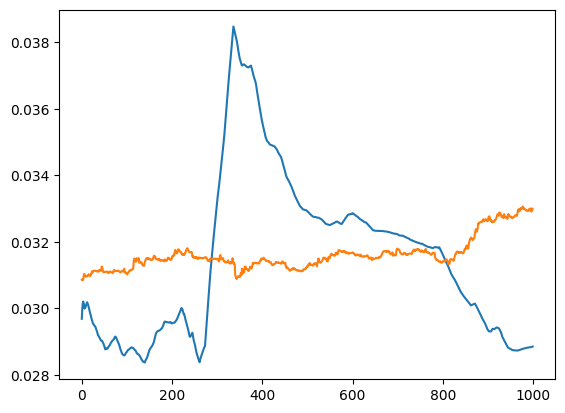

In [ ]:
print(d["best_agent"])
hist = np.array(t.amt_hist)
plt.plot(hist / np.linalg.norm(hist))
plt.plot(f/np.linalg.norm(f))
plt.x_lael
sum(f - hist)

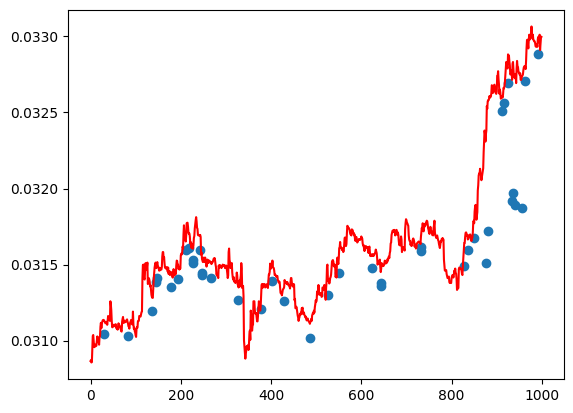

In [22]:
# plt.plot(f * np.array(d["best_agent"].probs))
x = []
y = []
for idx ,_ in enumerate(f * np.array(d["best_agent"].probs)):
    if _ > 0.031:
        x.append(idx)
        y.append(_)

plt.scatter(x,y)
plt.plot(f,'r')

In [ ]:
import gym
from gym import spaces
import numpy as np
from ray.rllib.env import MultiAgentEnv
import yaml

class CustomEnvironment(MultiAgentEnv):
    def __init__(self, config="RL_config.yaml"):
        
        settings = yaml.load(open(config),Loader=yaml.SafeLoader)

        fenv = forex()
        arr = fenv.min["Close"].to_numpy()
        l,s,c = calculate_macd(arr)
        c[c<=0] = -1
        c[c>0] = 1

        observ_space = np.vstack((arr,l,s))
        
        # Define your environment's parameters and configurations here
        self.observation_space = spaces.Box(low=0, high=1, shape=(...,))
        self.action_space = spaces.Discrete(...)
        # Initialize any other variables or components needed

    def reset(self):
        # Reset the environment to its initial state and return the initial observation
        return np.zeros(...)

    def step(self, action):
        # Take a step in the environment based on the given action
        # Calculate the next state, reward, done flag, and info dictionary
        next_observation = np.zeros(...)
        reward = 0
        done = False
        info = {}
        return next_observation, reward, done, info

    def render(self, mode='human'):
        # Render the environment for visualization (optional)
        pass

    def close(self):
        # Clean up resources or do any necessary cleanup (optional)
        pass


In [ ]:
import yaml




{'test': 1}

# ML part

Idea
* Get the model to recognize inflection points and act accordingly


In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(27,50),
    nn.ReLU(),
    nn.Linear(50,50),
    nn.ReLU(),
    nn.Linear(50,1)
)


Sequential(
  (0): Linear(in_features=27, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=5, bias=True)
)

YF.download() has changed argument auto_adjust default to True


In [ ]:
# from ray.rllib.algorithms.ppo import PPOConfig
# from ray.tune.logger import pretty_print


# algo = (
#     PPOConfig()
#     .env_runners(num_env_runners=1)
#     .resources(num_gpus=0)
#     .environment(env="CartPole-v1")
#     .build()
# )

# print("training")
# for i in range(10):
#     print(i)
#     result = algo.train()
#     print(pretty_print(result))

#     if i % 5 == 0:
#         checkpoint_dir = algo.save().checkpoint.path
#         print(f"Checkpoint saved in directory {checkpoint_dir}")

